## Importing Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Defining the Classes

In [ ]:
# We will define the class that assists in classification
class SpamClassifierClass:
    def __init__(self, train, val, test):
        self.train_X, self.train_y = train
        self.val_X, self.val_y = val
        self.test_X, self.test_y = test

    def tfidf_pipe(self, max_features):
        return TfidfVectorizer(max_features=max_features)

    def fit_model(self, model):
        pipeline = Pipeline([
            ('tfidf', self.tfidf_pipe(3000)),
            ('clf', model),
        ])
        pipeline.fit(self.train_X, self.train_y)
        return pipeline

    def improve_model(self, model, param_grid):
        pipeline = Pipeline([
            ('tfidf', self.tfidf_pipe(3000)),
            ('gscv', GridSearchCV(model, param_grid, cv=5)),
        ])
        pipeline.fit(self.val_X, self.val_y)
        return pipeline

    def evaluate_model(self, model):
        y_pred = model.predict(self.test_X)
        print(classification_report(self.test_y, y_pred))
        cm = confusion_matrix(self.test_y, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
        disp.plot(cmap='Blues')
        plt.title('Confusion Matrix')
        plt.show()

In [ ]:
train = pd.read_csv("train.csv")
train_X, train_Y = train['text'], train['spam']

test = pd.read_csv("test.csv")
test_X, test_Y = test['text'], test['spam']

val = pd.read_csv("validation.csv")
val_X, val_Y = val['text'], val['spam']

In [ ]:
spam_classifier = SpamClassifierClass((train_X, train_Y), (val_X, val_Y), (test_X, test_Y))

### Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=2000)
best_lr_model = spam_classifier.fit_model(lr_model)

### SVC

In [ ]:
svc_model = SVC(random_state=42)
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
best_svc_model = spam_classifier.improve_model(svc_model, svc_param_grid)

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
best_rf_model = spam_classifier.improve_model(rf_model, rf_param_grid)

### XGBoost

In [ ]:
xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}
best_xgb_model = spam_classifier.improve_model(xgb_model, xgb_param_grid)

## Evaluating the models

### Logistic Regression

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       872
           1       0.99      0.92      0.95       274

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



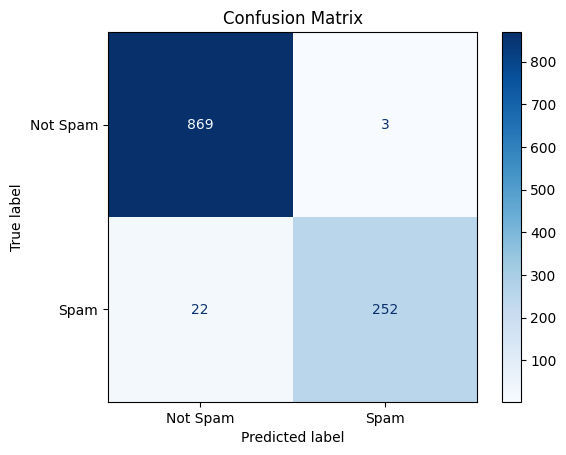

In [ ]:
spam_classifier.evaluate_model(best_lr_model)

### Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.98      0.96      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



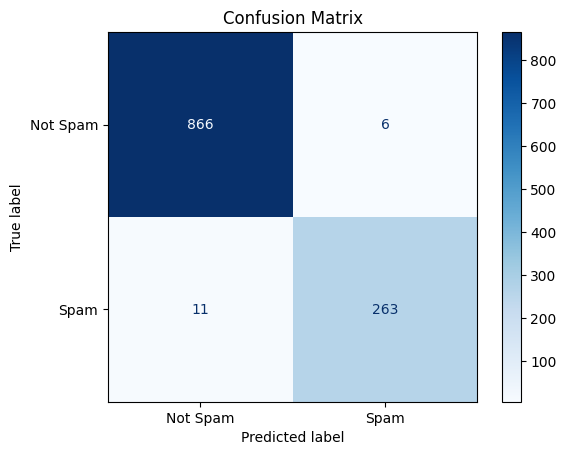

In [ ]:
spam_classifier.evaluate_model(best_rf_model)

### SVC

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       872
           1       0.97      0.95      0.96       274

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146



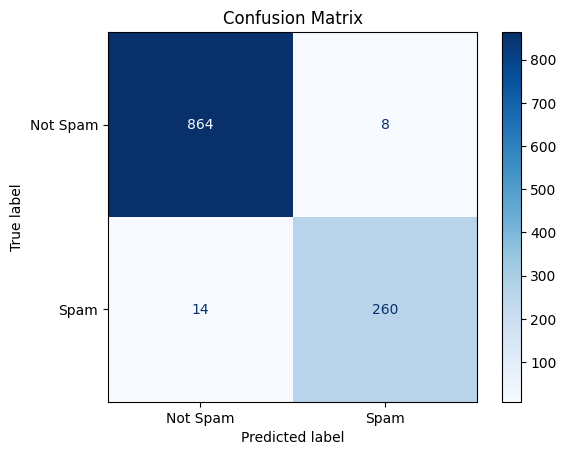

In [ ]:
spam_classifier.evaluate_model(best_svc_model)

### XGBoost

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       872
           1       0.94      0.97      0.95       274

    accuracy                           0.98      1146
   macro avg       0.96      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146



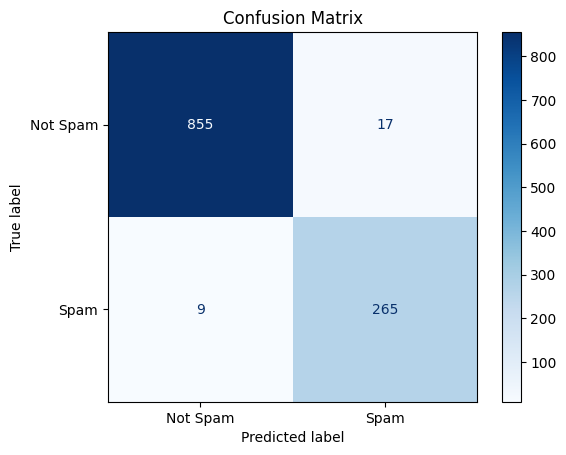

In [ ]:
spam_classifier.evaluate_model(best_xgb_model)

## Conclusion

### We can see that **RandomForestClassifier** does slightly better than the other 3 models, with best accuracy of **`0.99`**